In [1]:
pip install pandas numpy matplotlib statsmodels


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Carregar as tabelas do NHANES no formato XPT
url_demographics = 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.XPT' # Changed .htm to .XPT
url_body_measures = 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.XPT' # Changed .htm to .XPT
url_glucose= 'https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/GLU_I.XPT' # Changed .htm to .XPT

# Carregando os dados
demographics = pd.read_sas(url_demographics)
body_measures = pd.read_sas(url_body_measures)
glucose = pd.read_sas(url_glucose)


# Merge dos dados usando o identificador SEQN
merged_data = demographics.merge(body_measures, on='SEQN').merge(glucose, on='SEQN')

# Print the columns of merged_data to check for the correct column name
print(merged_data.columns)

# Seleção das colunas de interesse: idade, IMC e glicose
# If 'GLU_I' is not present, replace it with the correct column name from the printed output
data_filtered = merged_data[['RIDAGEYR', 'BMXBMI', 'LBXGLU']] # Changed 'LBXGLUSI' to 'LBXGLU'

# Filtrar participantes com idade entre 20 e 60 anos
data_filtered = data_filtered[(data_filtered['RIDAGEYR'] >= 20) & (data_filtered['RIDAGEYR'] <= 60)]

# Remover dados faltantes
data_filtered = data_filtered.dropna()

Index(['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN',
       'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMQADFC',
       'DMDBORN4', 'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL',
       'RIDEXPRG', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY',
       'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA', 'DMDHHSIZ',
       'DMDFMSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DMDHRGND', 'DMDHRAGE',
       'DMDHRBR4', 'DMDHREDU', 'DMDHRMAR', 'DMDHSEDU', 'WTINT2YR', 'WTMEC2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR', 'BMDSTATS',
       'BMXWT', 'BMIWT', 'BMXRECUM', 'BMIRECUM', 'BMXHEAD', 'BMIHEAD', 'BMXHT',
       'BMIHT', 'BMXBMI', 'BMDBMIC', 'BMXLEG', 'BMILEG', 'BMXARML', 'BMIARML',
       'BMXARMC', 'BMIARMC', 'BMXWAIST', 'BMIWAIST', 'BMXSAD1', 'BMXSAD2',
       'BMXSAD3', 'BMXSAD4', 'BMDAVSAD', 'BMDSADCM', 'WTSAF2YR', 'LBXGLU',
       'LBDGLUSI'],
      dtype='object')


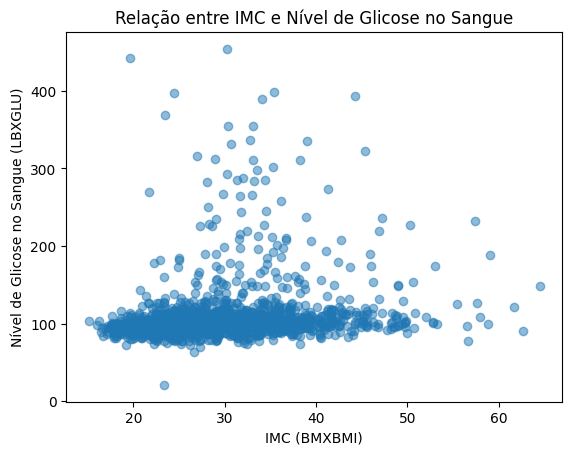

In [25]:
# Scatter plot entre IMC e PAS
plt.scatter(data_filtered['BMXBMI'], data_filtered['LBXGLU'], alpha=0.5)
plt.title('Relação entre IMC e Nível de Glicose no Sangue')
plt.xlabel('IMC (BMXBMI)')
plt.ylabel('Nível de Glicose no Sangue (LBXGLU)')
plt.show()


In [26]:
# Variável dependente (y) e independente (X)
X = data_filtered['BMXBMI']
y = data_filtered['LBXGLU']

# Adicionar constante ao modelo
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Resumo do modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 LBXGLU   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     59.93
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           1.71e-14
Time:                        21:29:51   Log-Likelihood:                -8266.8
No. Observations:                1641   AIC:                         1.654e+04
Df Residuals:                    1639   BIC:                         1.655e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.1129      3.823     20.956      0.0

In [28]:
# Previsão de diabetes (y_pred)
y_pred = model.predict(X)

# Cálculo das métricas de avaliação
r2 = model.rsquared
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"R²: {r2}")
print(f"Erro Médio Absoluto (MAE): {mae}")
print(f"Erro Quadrático Médio (MSE): {mse}")


R²: 0.03527380325036977
Erro Médio Absoluto (MAE): 18.40896505916594
Erro Quadrático Médio (MSE): 1390.5658496134267


In [31]:
demographics = pd.read_sas(url_demographics, format='xport')
body_measures = pd.read_sas(url_body_measures, format='xport')
glucose= pd.read_sas(url_glucose, format='xport')


In [32]:
print(demographics.head())
print(body_measures.head())
print(glucose.head())


      SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0  83732.0       9.0       2.0       1.0      62.0       NaN       3.0   
1  83733.0       9.0       2.0       1.0      53.0       NaN       3.0   
2  83734.0       9.0       2.0       1.0      78.0       NaN       3.0   
3  83735.0       9.0       2.0       2.0      56.0       NaN       3.0   
4  83736.0       9.0       2.0       2.0      42.0       NaN       4.0   

   RIDRETH3  RIDEXMON  RIDEXAGM  ...  DMDHREDU  DMDHRMAR  DMDHSEDU  \
0       3.0       1.0       NaN  ...       5.0       1.0       3.0   
1       3.0       1.0       NaN  ...       3.0       3.0       NaN   
2       3.0       2.0       NaN  ...       3.0       1.0       3.0   
3       3.0       2.0       NaN  ...       5.0       6.0       NaN   
4       4.0       2.0       NaN  ...       4.0       3.0       NaN   

        WTINT2YR       WTMEC2YR  SDMVPSU  SDMVSTRA  INDHHIN2  INDFMIN2  \
0  134671.370419  135629.507405      1.0     125.0      10.0